<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Visual_EDA_Job_Descriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The EDA is done following this path https://towardsdatascience.com/text-classification-in-python-dd95d264c802
# To install it, please type this command in the shell(terminal): ! conda install -c conda-forge altair vega_datasets notebook vega

/bin/bash: conda: command not found


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
#alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Exploratory Data Analysis on the dataset

# For further information please visit the project site: https://altair-viz.github.io/

In [ ]:
# Open the dataset from https://data.world/jobspikr/10000-data-scientist-job-postings-from-the-usa

import pandas as pd
df = pd.read_csv('https://query.data.world/s/hpv4ejstsxjszdo2eathrfgjhzqlqy')
df.head(10)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,Usa,2019-02-05,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,Usa,2019-02-06,Job Title: - Sr. Data Science Consultant Durat...,Contract,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,Usa,2019-02-05,• 3+ years related a professional experience ...,Contract,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN


In [ ]:
df.shape

(10000, 22)

In [ ]:
# Create a slice with the columns to look at

df_slice=df[['job_title', 'category', 'company_name',
       'city', 'state', 'country', 'inferred_city', 'inferred_state',
       'inferred_country', 'post_date', 'job_description', 'job_type']]

df_slice.shape

(10000, 12)

In [ ]:
# Drop the columns with nan values

df_full = df_slice.dropna(how='any',axis=0)
df_full.shape

(8048, 12)

In [ ]:
# For visualizaiton make a slice of 1000 rows (the visualizaiton tool will work with up to 5000 rows only)

data=df_full.iloc[:1000]
data

,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type
0,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined
3,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined
4,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time
5,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,Usa,2019-02-05,Read what people are saying about working here...,Undefined
6,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...
1464,AWS Data Scientist,architecture and engineering,Jefferson Frank,Long Beach,CA,Usa,Long beach,California,Usa,2019-04-02,"AWS Data Scientist - Santa Monica, CA - $160k ...",Full Time
1465,Data Scientist - AWS/Spark/Scala Required,architecture and engineering,Jefferson Frank,Washington,DC,Usa,Washington,Washington d.c.,Usa,2019-04-02,Big Data Software Engineer - D.C. Area Descrip...,Full Time
1466,Data Scientist,Accounting/Finance,"CICONIX, LLC",Falls Church,VA,Usa,Falls church,Virginia,Usa,2019-04-03,Responsibilities and Duties\n\nModeling comple...,Undefined
1467,Data Scientist,Accounting/Finance,"CICONIX, LLC",Washington,DC,Usa,Washington,Washington d.c.,Usa,2019-04-03,Responsibilities and Duties\n\nModeling comple...,Undefined


In [ ]:
# create new column with just the first name of the category name

data['cat']=data['category'].str.split().str[0]

data['cat'] = data['cat'].apply(lambda x: ' '.join(sorted(x.split())))
data['cat'].unique()

array(['Accounting/Finance', 'biotech', 'Computer/Internet',
       'Arts/Entertainment/Publishing', 'military', 'business',
       'Engineering/Architecture', 'Manufacturing/Mechanical', 'life',
       'Banking/Loans', 'agriculture', 'Education/Training', 'science',
       'arts', 'Customer+Service', 'food', 'technology', 'Healthcare',
       'Government/Military', 'architecture', 'community', 'production',
       'r', 'Insurance', 'security', 'healthcare', 'Human+Resources',
       'Administrative', 'language', 'media', 'Sales', 'advertising',
       'office', 'Restaurant/Food+Service', 'Telecommunications',
       'Construction/Facilities', 'Legal', 'Marketing/Advertising/PR',
       'Non-Profit/Volunteering', 'Pharmaceutical/Bio-tech', 'education',
       'management', 'transportation'], dtype=object)

In [ ]:
data['cat']= data['cat'].replace(['Accounting/Finance','Accounting-or-finance','finance','financieel'],'Finance')
data['cat']= data['cat'].replace(['biotech','Pharmaceutical/Bio-tech','science','math'],'Biotech')
data['cat']= data['cat'].replace(['Computer/Internet','technology','Computer-or-internet','computer'],'Computer/Tech')
data['cat']= data['cat'].replace(['life','social','r','animal','higher','personal'],'Misc')
data['cat']= data['cat'].replace(['Arts/Entertainment/Publishing','Arts-or-entertainment-or-publishing','entertainment'],'Entertainment')
data['cat']= data['cat'].replace(['production','media','community','advertising','Marketing/Advertising/PR','Sales','sales','Marketing-or-advertising-or-pr'],'SocialMedia/Marketing')
data['cat']= data['cat'].replace(['military','Government/Military','science','Government-or-military'],'Military')
data['cat']= data['cat'].replace(['business','management','Upper-Management-or-consulting'],'Business/Consulting')
data['cat']= data['cat'].replace(['Administrative','office','administrative'],'Administrative')
data['cat']= data['cat'].replace(['Engineering/Architecture','architecture','Engineering-or-architecture','engineering'],'Engineering/Architecture')
data['cat']= data['cat'].replace(['Manufacturing/Mechanical','production','manufacturing','Manufacturing-or-mechanical'],'Manufacturing')
data['cat']= data['cat'].replace(['Banking/Loans','Banking-or-loans'],'Banking')
data['cat']= data['cat'].replace(['agriculture',],'Agriculture')
data['cat']= data['cat'].replace(['Restaurant/Food+Service','food','Restaurant-or-food-Service'],'FoodService')
data['cat']= data['cat'].replace(['Education/Training','education','Education-or-training'],'Education/Training')
data['cat']= data['cat'].replace(['science','math'],'Math/Science')
data['cat']= data['cat'].replace(['Healthcare','healthcare','service','Customer-Service'],'Healthcare')
data['cat']= data['cat'].replace(['Customer+Service','Telecommunications','service','Customer-Service'],'CustomerService')
data['cat']= data['cat'].replace(['Insurance','protective'],'Insurance')
data['cat']= data['cat'].replace(['security','Law-Enforcement-or-security'],'Security')
data['cat']= data['cat'].replace(['Human+Resources','Human-Resources'],'HumanResources')
data['cat']= data['cat'].replace(['language'],'Language')
data['cat']= data['cat'].replace(['Construction/Facilities','building','Construction-or-facilities','construction'],'Construction')
data['cat']= data['cat'].replace(['Legal','legal'],'Legal')
data['cat']= data['cat'].replace(['arts'],'Arts')
data['cat']= data['cat'].replace(['transportation','Transportation/Logistics','Transportation-or-logistics'],'Transportation')
data['cat']= data['cat'].replace(['Hospitality-or-travel','Hospitality/Travel'],'Hospitality/Travel')

In [ ]:
data['cat'].unique()

array(['Finance', 'Biotech', 'Computer/Tech', 'Entertainment', 'Military',
       'Business/Consulting', 'Engineering/Architecture', 'Manufacturing',
       'Misc', 'Banking', 'Agriculture', 'Education/Training', 'Arts',
       'CustomerService', 'FoodService', 'Healthcare',
       'SocialMedia/Marketing', 'Insurance', 'Security', 'HumanResources',
       'Administrative', 'Language', 'Construction', 'Legal',
       'Non-Profit/Volunteering', 'Transportation'], dtype=object)

In [ ]:
# Let's plot number of articles in each category

bars = alt.Chart(data).mark_bar(size=50).encode(
    x=alt.X("cat"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of Job Postings')),
    tooltip=[alt.Tooltip('count()', title='Job Category'), 'cat'],
    color='cat'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of jobs in each category",
)

alt.LayerChart(...)

In [ ]:
# Percent of jobs in each category

data['id'] = 1
data2 = pd.DataFrame(data.groupby('cat').count()['id']).reset_index()

bars = alt.Chart(data2).mark_bar(size=50).encode(
    x=alt.X('cat'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Jobs')),
    color='cat'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of jobs in each category",
)

alt.LayerChart(...)

In [ ]:
# Job posts lenght by category

data['Job_post_length'] = data['job_description'].str.len()

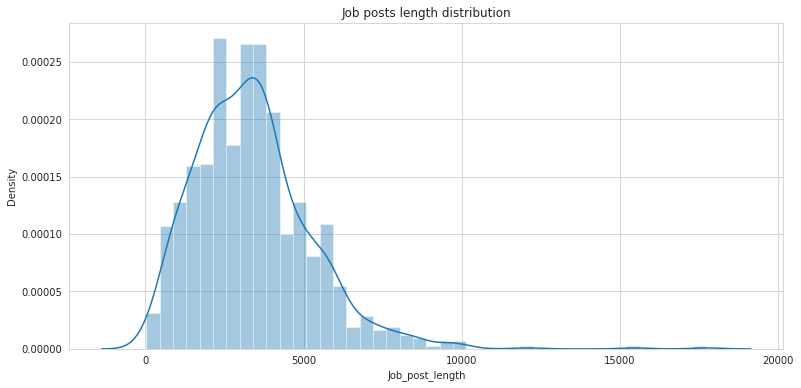

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Job_post_length']).set_title('Job posts length distribution');

In [ ]:
data['Job_post_length'].describe()

count     1000.000000
mean      3377.406000
std       1866.547149
min         24.000000
25%       2151.750000
50%       3192.500000
75%       4261.750000
max      17730.000000
Name: Job_post_length, dtype: float64

In [ ]:
# Removing 95% percentile to aprpeciate the distribution bettwe

quantile_95 = data['Job_post_length'].quantile(0.95)
data_95 = data[data['Job_post_length'] < quantile_95]

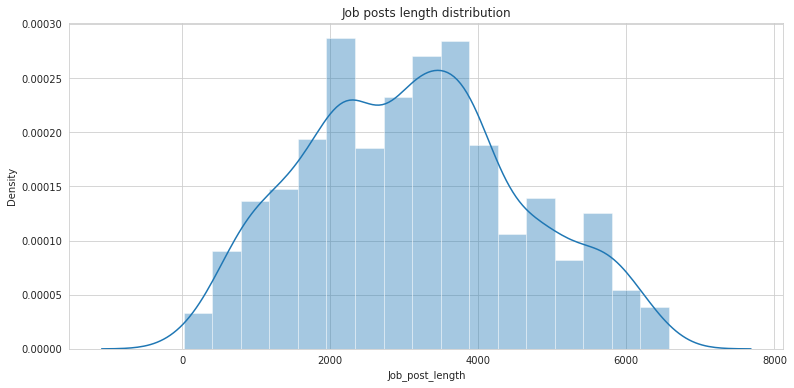

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_95['Job_post_length']).set_title('Job posts length distribution');

In [24]:
data_more10k = data[data['Job_post_length'] > 10000]
len(data_more10k)

4

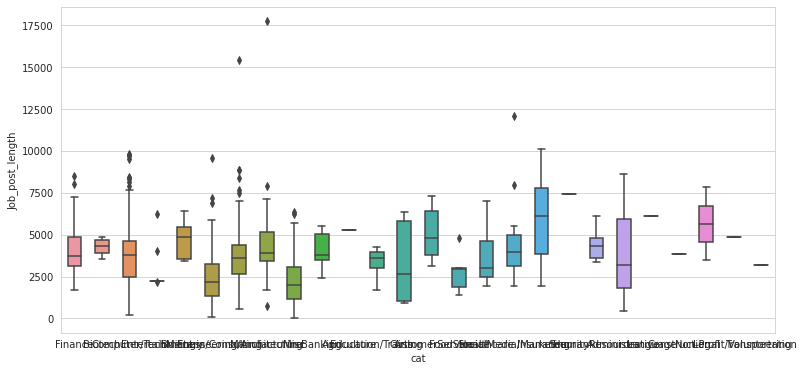

In [25]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data, x='cat', y='Job_post_length', width=.5);

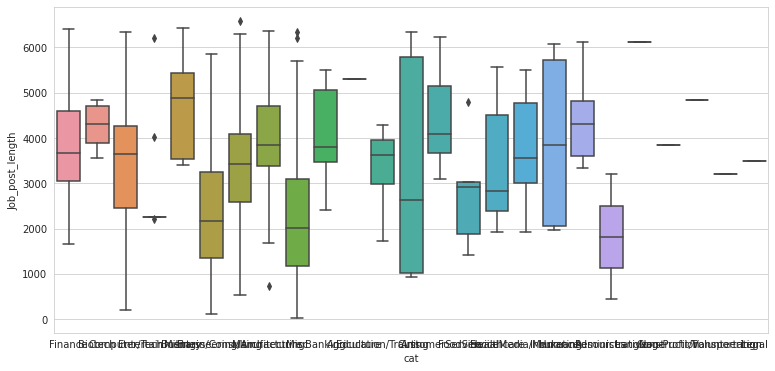

In [26]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data_95, x='cat', y='Job_post_length');

In [27]:
with open('Jobs_dataset.pickle', 'wb') as output:
    pickle.dump(data, output)